# <center> Data Description </center>

### Description:

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. We can use this dataset for regression, clustering and classification for e.g. to predict the sale of items or to predict the products which have been purchased previously and the user is most likely to buy the same products in their next order etc. 

### Abstract: 

- A real online retail transaction data set of two years.

### Data Set Information:

The online_retail.csv contains 387961 rows and 8 columns.

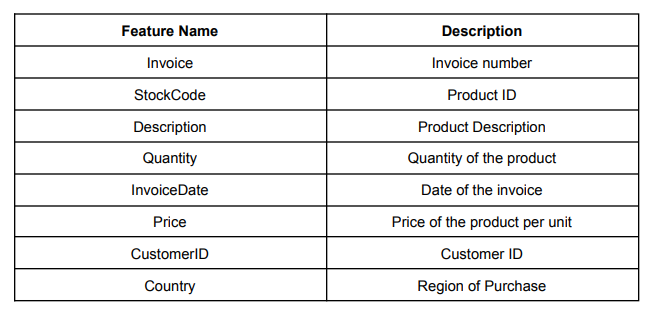

### Problem Statement: 

An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.

1. Using the above data, find useful insights about the customer purchasing history that can be an added advantage for the online retailer.
2. Segment the customers based on their purchasing behavior.


---

### Overview of data

#### Detailed overview of dataset

> * Records in the dataset = 525461 ROWS

> * Columns in the dataset  = 8 COLUMNS

> 1. InvoiceNo: A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation (Nominal)

> 2. StockCode:  A 5-digit integral number uniquely assigned to each distinct product (Nominal)

> 3. Description: Product (item) name. (Nominal)

> 4. Quantity: The quantities of each product (item) per transaction ( Numeric)

> 5. InvoiceDate:  The day and time when each transaction was generated (Numeric)

> 6. UnitPrice: Product price per unit in sterling (Numeric)

> 7. CustomerID:  A 5-digit integral number uniquely assigned to each customer (Nominal)

> 8. Country:  Name of the country where each customer resides (Nominal)

### Importing Required Libraries

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
# !pip install squarify
import squarify
sns.set_style("whitegrid")


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings("ignore")

# <center> Data Exploration</center>

In [2]:
df = pd.read_csv(r"C:\Users\erpra\Documents\Capstone_DSAI\My_Assignment\Capstone_Project_2_DSAI\OnlineRetail.csv", 
                 encoding='cp1252',
                 header=0)

df.shape

(541909, 8)

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isna().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null.sort_values(ascending=False)

CustomerID     24.93
Description     0.27
InvoiceNo       0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
Country         0.00
dtype: float64

In [7]:
col_n = df.columns

for col in col_n:
    print(f"Total number of unique values for {col}: {df[col].nunique()}")

Total number of unique values for InvoiceNo: 25900
Total number of unique values for StockCode: 4070
Total number of unique values for Description: 4223
Total number of unique values for Quantity: 722
Total number of unique values for InvoiceDate: 23260
Total number of unique values for UnitPrice: 1630
Total number of unique values for CustomerID: 4372
Total number of unique values for Country: 38


In [8]:
print("Summary:")
#exploring the unique values of each attribute
print("\nNumber of invoices: ", df['InvoiceNo'].nunique())
print("Number of products bought: ",df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )
print("Average quantity of product purchased by a customer: ", round(np.mean(df.groupby("CustomerID").Quantity.sum()), 0))
print("Average revenue generated per customer: ", round(np.mean(df.groupby("CustomerID").UnitPrice.sum()), 2))
print("Average product quantity sold per transaction: ", round(df.Quantity.mean(), 0))
print("Average revenue generated per transaction: ", round(df.UnitPrice.mean(), 2) )

Summary:

Number of invoices:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Average quantity of product purchased by a customer:  1122.0
Average revenue generated per customer:  322.01
Average product quantity sold per transaction:  10.0
Average revenue generated per transaction:  4.61


#### Encoding Date Field as a datetime object

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


---

# <center> Exploratory Data Analysis </center>

---

In [10]:
df['TotalPrice'] = df.apply(lambda row: row['UnitPrice'] * row['Quantity'], axis = 1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Grouping multiple columns

In [11]:
# df.groupby(['StockCode', 'Description'])['InvoiceNo'].count()

#To make it into a dataframe
invoice_count = df.groupby(["StockCode", "Description"], as_index=False)["InvoiceNo"].count()
invoice_count.sort_values(by=['InvoiceNo'], ascending=False).head(25)

,StockCode,Description,InvoiceNo
4223,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1554,22423,REGENCY CAKESTAND 3 TIER,2200
4197,85099B,JUMBO BAG RED RETROSPOT,2159
3295,47566,PARTY BUNTING,1727
210,20725,LUNCH BAG RED RETROSPOT,1638
3956,84879,ASSORTED COLOUR BIRD ORNAMENT,1501
1890,22720,SET OF 3 CAKE TINS PANTRY DESIGN,1473
531,21212,PACK OF 72 RETROSPOT CAKE CASES,1385
213,20727,LUNCH BAG BLACK SKULL.,1350
1593,22457,NATURAL SLATE HEART CHALKBOARD,1280


**Inference:** We can see here the most purchased items as per their invoice counts.

### Group by and get multiple statistics for different columns
Calculating receny, frequency, and the customer lifetime value

In [12]:
#Getting recency frequency and customer lifetime value
RFCLTV = df.groupby(
   ['Country', 'CustomerID'], as_index=False
).agg(
    {
         'InvoiceNo':'count',    # count number of orders for each customer in each country
         'TotalPrice': "sum",  # get the count of networks
         'InvoiceDate': 'last'  # get the last date per group
    }
)
RFCLTV.sort_values(by=['TotalPrice','InvoiceNo'], ascending=False).head(15)

,Country,CustomerID,InvoiceNo,TotalPrice,InvoiceDate
321,Netherlands,14646.0,2085,279489.02,2011-12-08 12:12:00
4237,United Kingdom,18102.0,433,256438.49,2011-12-09 11:50:00
3766,United Kingdom,17450.0,351,187482.17,2011-12-01 13:29:00
81,EIRE,14911.0,5903,132572.62,2011-12-08 15:54:00
3,Australia,12415.0,778,123725.45,2011-11-15 14:22:00
80,EIRE,14156.0,1420,113384.14,2011-11-30 10:54:00
3808,United Kingdom,17511.0,1076,88125.38,2011-12-07 10:12:00
3214,United Kingdom,16684.0,281,65892.08,2011-12-05 14:06:00
1051,United Kingdom,13694.0,585,62653.10,2011-12-06 09:32:00
2209,United Kingdom,15311.0,2491,59419.34,2011-12-09 12:00:00


**Inference:** Here, we can see most of the sales is from "United Kingdom" and the larger sale is for a user & he belongs to "Netherlands".

### Combining date based aggregations and group by multiple column aggregations or Quantity Based Analysis

Naming grouped aggregate columns with multiple statistics, reset index to include the date column

In [13]:
agg_data = df.groupby([pd.Grouper(key='InvoiceDate', freq='MS'), 'Country'])\
    .agg(unique_items=('StockCode', 'nunique'),
         total_quantity=('Quantity','sum'),
         total_amount=('TotalPrice','sum')).reset_index()
agg_data_uk = agg_data[agg_data['Country']=='United Kingdom']
agg_data_uk = agg_data_uk.set_index('InvoiceDate')
print(f"The total number of rows as per the aggregation & total aount: {agg_data_uk.shape[0]}")
agg_data_uk.head(15)

The total number of rows as per the aggregation & total aount: 13


,Country,unique_items,total_quantity,total_amount
InvoiceDate,,,,
2010-12-01,United Kingdom,2802,298101,676742.620
2011-01-01,United Kingdom,2622,237381,434308.300
2011-02-01,United Kingdom,2409,225641,408247.910
2011-03-01,United Kingdom,2553,279843,559707.390
2011-04-01,United Kingdom,2548,257666,442254.041
2011-05-01,United Kingdom,2487,306452,596459.860
2011-06-01,United Kingdom,2638,258522,554478.350
2011-07-01,United Kingdom,2715,324129,565479.841
2011-08-01,United Kingdom,2575,319804,539130.500


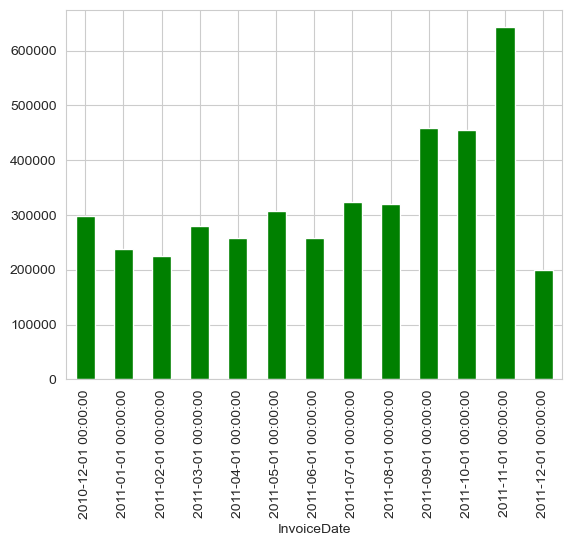

In [14]:
agg_data_uk['total_quantity'].plot(kind='bar', color='g')
plt.show()

**Inference:** Sales are getting increased in the month of September, October & November as compare to other months.

In [15]:
retail_uk = df[df['Country']=='United Kingdom']
groupedProduct = retail_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
1145,22197,52928
2995,84077,48326
3511,85099B,43167
3532,85123A,36706
3302,84879,33519
1528,22616,25307
452,21212,24702
1126,22178,23242
83,17003,22801
964,21977,20288


**Inference:** We can gather information about the large number of products purchased as per their StockCode for a specific countries.

Here, I have done for the United Kingdom.

In [16]:
invoice_quantity= retail_uk.groupby('InvoiceNo', as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
invoice_quantity.head()

,InvoiceNo,Quantity
20090,581483,80995
2136,541431,74215
17136,574941,14149
17765,576365,13956
13770,567423,12572


**Inference:** Further, I have recorded the number invoices for the same country.

### Time Based analysis

#### Revenue Per month 

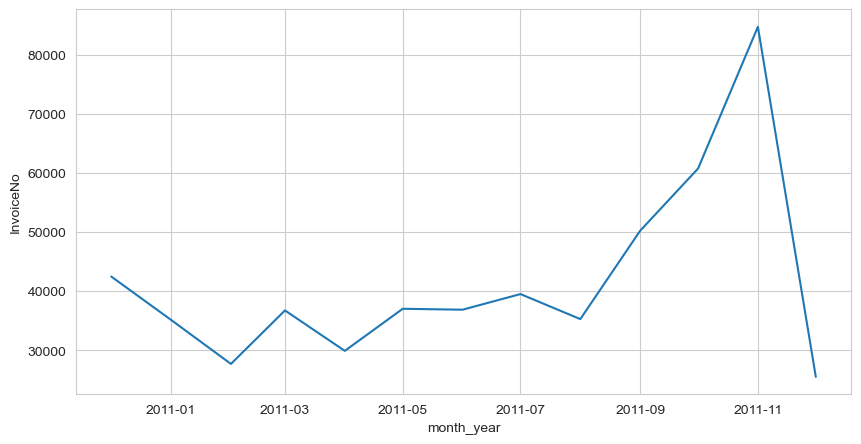

In [17]:
online_reatail_data = df.copy(deep=True)

online_reatail_data['InvoiceDate'] = pd.to_datetime(online_reatail_data['InvoiceDate'])

import datetime as dt
online_reatail_data['month'] = online_reatail_data['InvoiceDate'].dt.month
online_reatail_data['year'] = online_reatail_data['InvoiceDate'].dt.year
online_reatail_data['month_year'] = pd.to_datetime(online_reatail_data[['year', 'month']].assign(Day=1))
online_reatail_data['revenue'] = online_reatail_data['UnitPrice'] * online_reatail_data['Quantity']

plt.figure(figsize=(10,5))
plot = pd.DataFrame(online_reatail_data.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = plot)

#### Over-all Revenue trend  

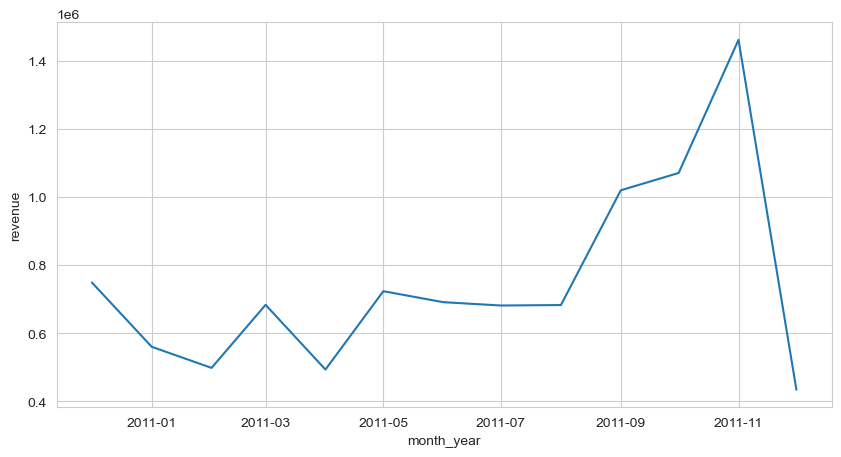

In [18]:
data2 = pd.DataFrame(online_reatail_data.groupby(['month_year'])['revenue'].sum()).reset_index()
plt.figure(figsize=(10,5))
ax = sns.lineplot(x = 'month_year', y='revenue', data = data2)

### Visualising the countries excluding United Kingdom

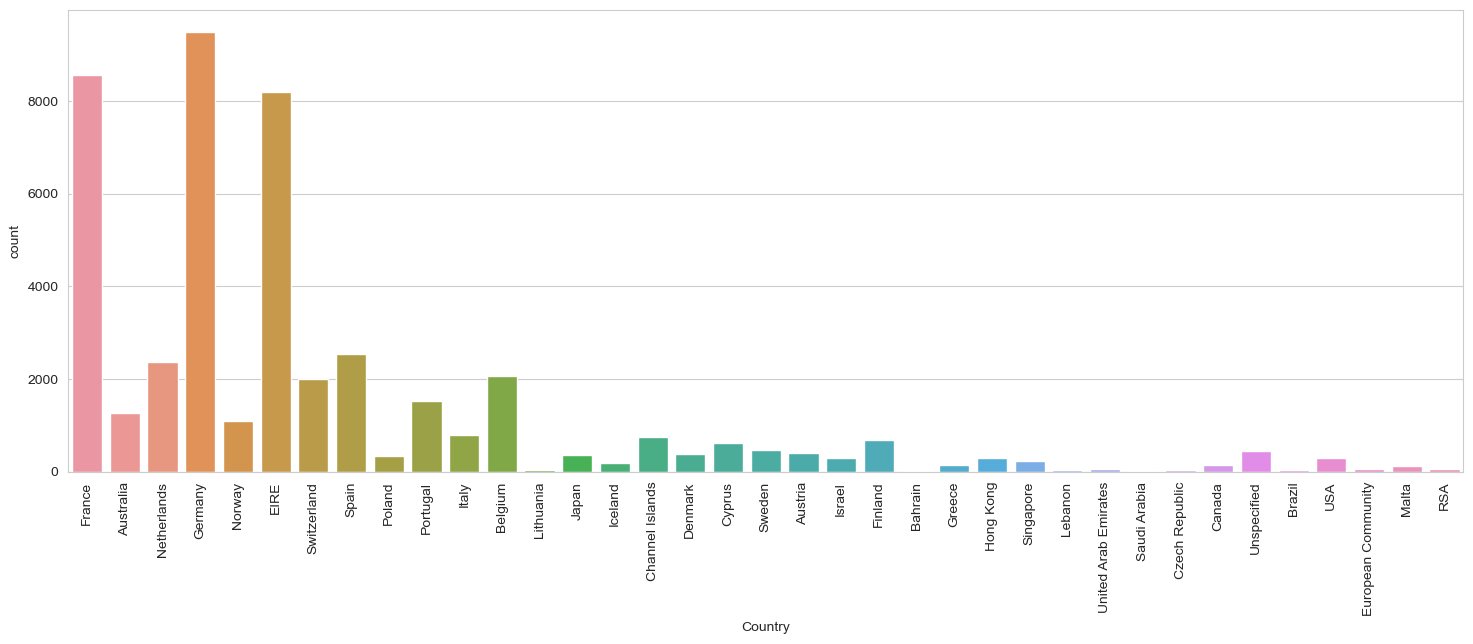

In [19]:
plt.figure(figsize=(18,6))
X = df[df['Country'] != 'United Kingdom']['Country']
sns.countplot(x=X)
plt.xticks(rotation=90)
plt.show()

### To make it visually more appealing let's create a bar chart for 15 top items

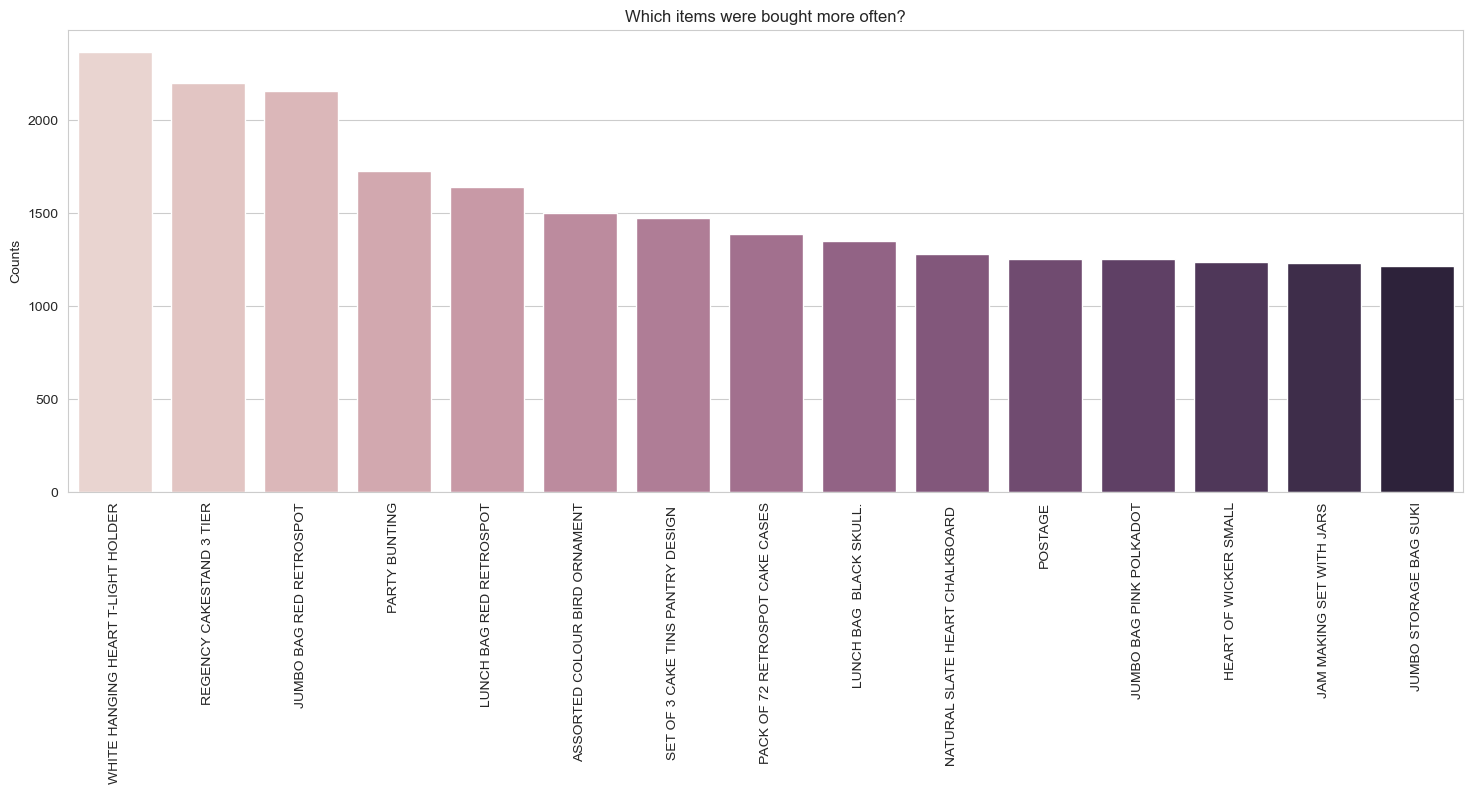

In [20]:
# Which items were bought more often?
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

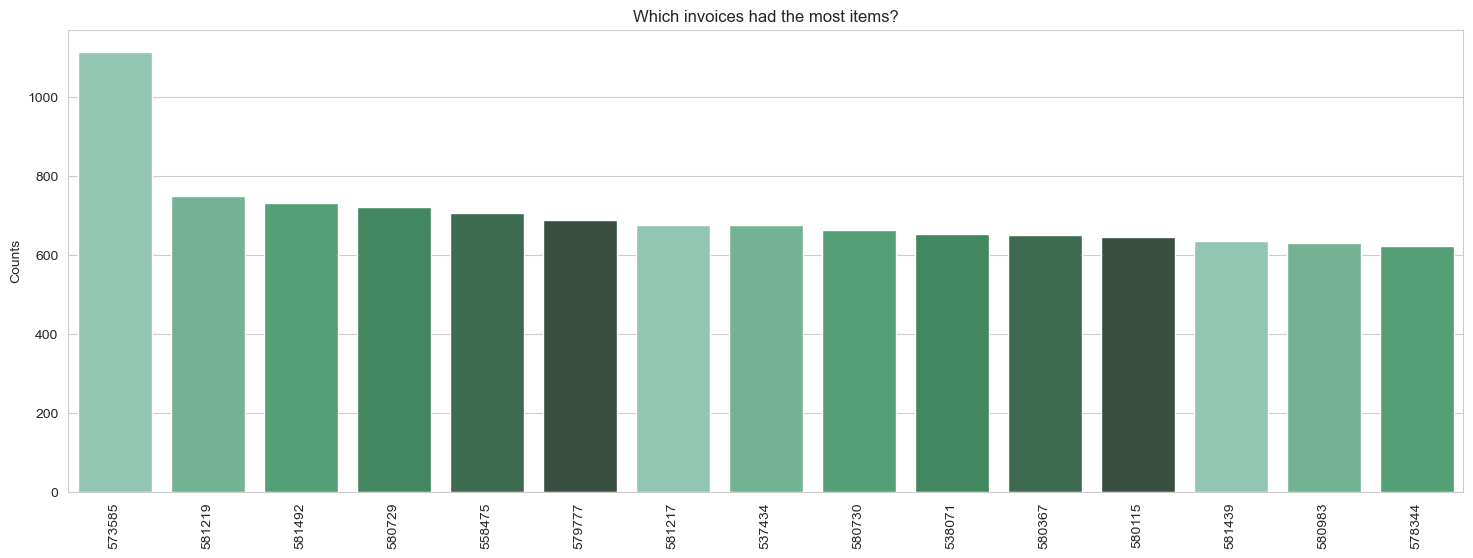

In [21]:
#  Which invoices had the most items?
inv_counts = df['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=inv_counts.index, y=inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

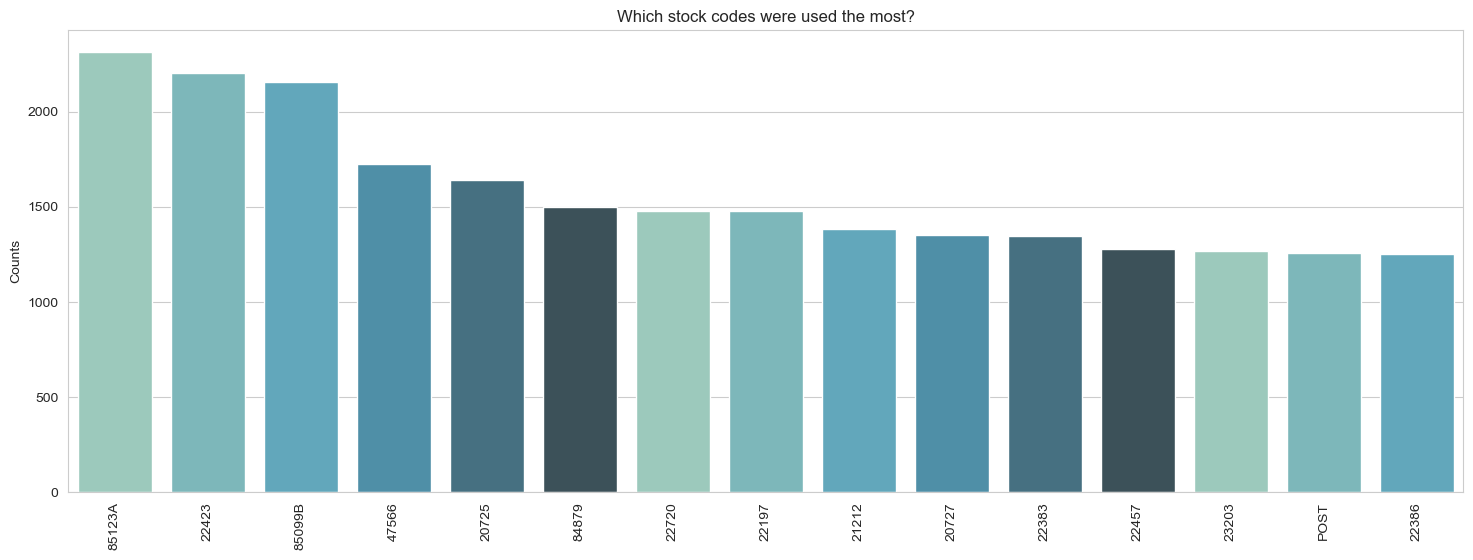

In [22]:
# Which stock codes were used the most?
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

### Analysis of different items, as per their StockCode, Quantity, UnitPrice and their Cancellation 

In [23]:
(df.CustomerID.value_counts()/sum(df.CustomerID.value_counts())*100).head(n=15).cumsum()

17841.0     1.962249
14911.0     3.413228
14096.0     4.673708
12748.0     5.814728
14606.0     6.498553
15311.0     7.110850
14646.0     7.623350
13089.0     8.079807
13263.0     8.492020
14298.0     8.895138
15039.0     9.265809
14156.0     9.614850
18118.0     9.930462
14159.0    10.228376
14796.0    10.514737
Name: CustomerID, dtype: float64

**Inferene:** It is seen that only 10 out of 4000+ customers are responsible for 10% of total orders. These must be the wholesale customers of the retail store

In [24]:
#Find number of unique items in stock
print(f"Number of unique item stock codes: {len(df.StockCode.unique())}")
print(f"Number of unique item descriptions: {len(df.Description.unique())}")

Number of unique item stock codes: 4070
Number of unique item descriptions: 4224


**Inference:** The count of unique stock unit ids and their descriptions should have matched but they do not. This implies some stock units might have more than one descriptions. Let us examine the reasons behind this data quality issue:

In [25]:
#Find out the stock units that have more than one description
dfStockDesc = df.groupby(["StockCode","Description"]).count().reset_index()
dfStockDesc.StockCode.value_counts()[dfStockDesc.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,72807A,5


Now, let us examine how a single unit code has multiple description:

In [26]:
df[df['StockCode'] == dfStockDesc.StockCode.value_counts()
         [dfStockDesc.StockCode.value_counts()>1].reset_index()
         ['index'][8]]['Description'].unique()

array(['JUMBO BAG VINTAGE CHRISTMAS ', 'came coded as 20713',
       'wrongly coded 20713', '20713 wrongly marked', '20713'],
      dtype=object)

**Inference:** We notice that this description is a manually entered field and thus has discrepancies and inconsistencies. However, since the objective of this task is customer segmentation, we avoid exploring and resolving this issue further

#### Exploring Quantity and Unit Price fields

In [27]:
df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

**Inference:** We see 10 goods being sold on an average with a standard deviation of around 200. Also, the minimum quantity includes a negative value, this implies that the dataset includes returned items as well, a common scenario in retail domain.

In [28]:
df[df['Quantity'] >= 1000].shape

(129, 9)

In [29]:
# sns.histplot(x=df['Quantity'], kde=True)

**Inference:** We can see there 129 enteries contain more than 1000 quantity ordered at a time, which is must considered to be an outliers.

In [30]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

**Inference:** The unit price field echoes the similar observations as Quantity variable.

Let's explore the canceled invoices/orders

### Cancelled invoices/orders

**Observation:** As mentioned in the description of the dataset and we also observed above that some InvoiceNo start with the letter "c" = cancelled. Let's see if our hypothesis is correct about the negative quantity: -80995.
We will look for the list of cancelled invoices and check if there is an invoice with that quantity.

In [31]:
#get canceled transactions
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
print(f"Total number of cancelled invoices/orders: {cancelled_orders.shape[0]}")
#percentage of cancelled orders in total orders
total_orders = df['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, 
                                                               total_orders, 
                                                               cancelled_number/total_orders*100))
cancelled_orders.head()

Total number of cancelled invoices/orders: 9288
Percentage of orders canceled: 9288/25900 (35.86%) 


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


**Inference:** We have a large percentage of cancelled orders of 36% ~approx. Studying these cancelled orders may help in preventing future cancellation.

### Total Insights gathered:

# <center> Data Cleaning/Preprocessing </center>

In [32]:
df.shape

(541909, 9)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


InvoiceDate columns is already been formated as 'datetime' datatype

In [34]:
# dropping tha NaN values from the dataset
df.dropna(inplace=True)
print(f"Shape of dataset after dropping the NaN values: {df.shape}")

Shape of dataset after dropping the NaN values: (406829, 9)


In [35]:
# Excluding the cancelled order/invoices, which contains 'c' and some negetive values in 'Quantity' and 'UnitPrice' columns

# Invoices containing 'c' is caused by the refund invoices, reassign df without refund invoices
df = df[~df["InvoiceNo"].str.contains("C", na=False)]
print(f"Final shape of dataset after dropping the cancelled invoice enteries: {df.shape}")

Final shape of dataset after dropping the cancelled invoice enteries: (397924, 9)


### Outliers Analysis

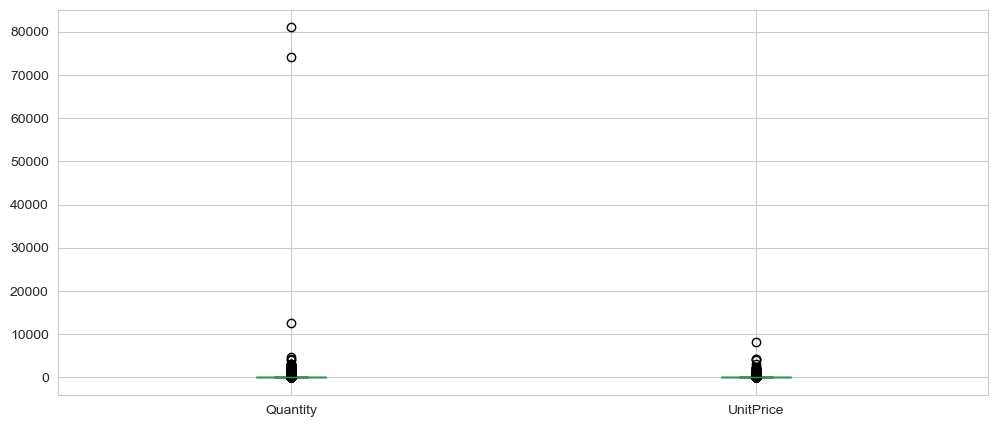

In [36]:
df[["Quantity", "UnitPrice"]].boxplot(figsize=(12,5));

In [37]:
df.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,397924.0,13.021823,180.420210,1.0,1.00,1.00,1.00,2.00,6.00,12.00,24.00,36.0,120.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,0.21,0.42,0.55,1.25,1.95,3.75,6.35,8.5,14.95,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,12415.00,12627.00,12883.00,13969.00,15159.00,16795.00,17725.00,17912.0,18211.00,18287.00
TotalPrice,397924.0,22.394749,309.055588,0.0,0.55,1.25,1.95,4.68,11.80,19.80,35.40,67.5,202.50,168469.60


In [38]:
# Q1_q, Q3_q = df['Quantity'].quantile(0.25), df['Quantity'].quantile(0.75)
# Q1_up, Q3_up= df['UnitPrice'].quantile(0.25), df['UnitPrice'].quantile(0.75)

# df1 = df.copy(deep=True)

# from scipy import stats
# df1['z_score'] = stats.zscore(df1)
# df1 = df1[(df1['z_score'] < 3) & (df1['z_score'] > -3)]
# df1.shape

# def remove_outlier(df, col):
#     # Calculate the IQR
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
    
    

# # Identify the outliers
# outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

# df1 = df1.drop(index=df[outliers].index)

# remove_outlier(df1,"Quantity")
# remove_outlier(df1,"UnitPrice")

# df1.head()

# <center> Feature Extraction with the help of RFM Analysis </center>

## RFM Segmentation
RFM is a data modeling method used to analyze customer value. It stands for recency, frequency, and monetary, which are just three metrics that describe what your customers did.

- Recency (R) of a customer: Days since the last purchase.
- Frequency (F) of the bookings/turnover of a customer: Number of purchases, e.g., in 6 months.
- Monetary (M) - The total turnover of a customer: Sum of sales, e.g., in 6 months.

For the analysis, 

Created a new dataframe called 'rfm' in order to calculate Recency, Frequency and Monetary values.
* the number of days between the last purchase date of this customer is Recency
* the number of unique invoices of this customer is Frequency
* the sum of sales is this customer's Monetary

<img src="https://online.visual-paradigm.com/repository/images/f4a4320e-b9d8-4215-81fc-2ec1aa8c057b/strategic-analysis-design/rfm-customer-segmentation-strategic-analysis.png" alt="Alternative text" />

**Reference:** Link: https://www.putler.com/rfm-analysis/

In [39]:
# taking the last date in the dataset
last_date = df['InvoiceDate'].max() #+ dt.timedelta(days=1)
last_date

Timestamp('2011-12-09 12:50:00')

In [40]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (last_date - date.max()).days,
                                    'InvoiceNo': lambda inv: inv.nunique(),
                                    'UnitPrice': lambda price: price.sum()})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,1.04
12347.0,1,7,481.21
12348.0,74,4,178.71
12349.0,18,1,605.10
12350.0,309,1,65.30


In [41]:
#checking if there are any zeros in rfm:
rfm.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Recency,4339.0,91.518322,100.009747,0.0,0.00,2.000,4.000,17.000,50.00,141.000,262.000,311.000,368.0000,373.00
Frequency,4339.0,4.271952,7.705493,1.0,1.00,1.000,1.000,1.000,2.00,5.000,9.000,13.000,30.0000,210.00
Monetary,4339.0,285.780275,880.545716,0.0,2.08,11.345,20.276,51.685,127.15,294.425,634.564,946.902,2016.6378,33332.45


## RFM Scores
* the min number of Recency metric means that this customer has just purchased, so the highest score (5) should be given to the lower number of Recency.
* the max number of Frequency and Monetary metrics mean that the customer is purchasing frequently and spending more money, so the highest score (5) should be given to the highest Frequency and Monetary values.

In [42]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [43]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.0,325,1,1.04,1,1,1,111
12347.0,1,7,481.21,5,5,5,555
12348.0,74,4,178.71,2,4,4,244
12349.0,18,1,605.10,4,1,5,415
12350.0,309,1,65.30,1,1,2,112


In [44]:
# displaying some of the customers with the highest scores:
print(f"Number of customer with 555 RFM_score: {rfm[rfm['RFM_SCORE'] == '555'].shape[0]}")
rfm[rfm['RFM_SCORE'] == "555"].head()

Number of customer with 555 RFM_score: 321


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12347.0,1,7,481.21,5,5,5,555
12362.0,2,10,1048.29,5,5,5,555
12417.0,2,9,1024.88,5,5,5,555
12423.0,0,8,364.20,5,5,5,555
12433.0,0,7,920.95,5,5,5,555


#### Assigning labels/names to all the Customers on the basis of the RFM Scores

<img src="https://productscdn.notifyvisitors.com/products/wp-content/uploads/2022/04/20051636/rfm-analysis_banner.png" alt="Alternative text" />

In [45]:
# the following dict has been made according to the famous RFM graphic
seg_map = {
    r'[1-2][1-2]': 'Hibernating',      # Customer's shopped long ago but with less frequency and monetary value
    r'[1-2][3-4]': 'At_Risk',          # Customer's shopping less often now who used to shop a lot
    r'[1-2]5': 'Cant_Lose',            # Customer's shopped long ago who used to shop a lot.
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',           # High monetary value but good recency and frequency values
    r'[3-4][4-5]': 'Loyal_Customers',  # High frequency as well as monetary value with good recency
    r'41': 'Promising',
    r'51': 'New_Customers',            # Customer's who recently started shopping a lot but with less monetary value
    r'[4-5][2-3]': 'Potential_Loyalists', # High recency and monetary value, average frequency
    r'5[4-5]': 'Best Customers'        # Highest frequency as well as monetary value with least recenc
}

In [46]:
# using Recency and Frequency scores for customer segmentation. 
# assuming that a customer who has recently purchased and who is often purchasing should have high RFM scores.
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm=rfm.reset_index()
rfm.head()

,CustomerID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
0,12346.0,325,1,1.04,1,1,1,111,Hibernating
1,12347.0,1,7,481.21,5,5,5,555,Best Customers
2,12348.0,74,4,178.71,2,4,4,244,At_Risk
3,12349.0,18,1,605.10,4,1,5,415,Promising
4,12350.0,309,1,65.30,1,1,2,112,Hibernating


In [47]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency          Monetary      
                           mean count       mean count        mean count
Segment                                                                 
About_to_Sleep        52.504274   351   1.162393   351   85.001225   351
At_Risk              154.062069   580   2.865517   580  173.773984   580
Best Customers         4.876777   633  12.417062   633  806.139953   633
Cant_Lose            131.428571    63   8.380952    63  402.987619    63
Hibernating          216.897653  1065   1.101408  1065   75.757899  1065
Loyal_Customers       32.469166   827   6.458283   827  451.860412   827
Need_Attention        52.064516   186   2.327957   186  214.011505   186
New_Customers          5.857143    42   1.000000    42   65.358810    42
Potential_Loyalists   16.123984   492   2.010163   492  141.391280   492
Promising             22.350000   100   1.000000   100   72.150200   100

In [48]:
# creating a dataframe as per segment count
retail_rfm_segments = rfm.groupby('Segment')['CustomerID'].count().reset_index(name='counts')
retail_rfm_segments.head(15)

,Segment,counts
0,About_to_Sleep,351
1,At_Risk,580
2,Best Customers,633
3,Cant_Lose,63
4,Hibernating,1065
5,Loyal_Customers,827
6,Need_Attention,186
7,New_Customers,42
8,Potential_Loyalists,492
9,Promising,100


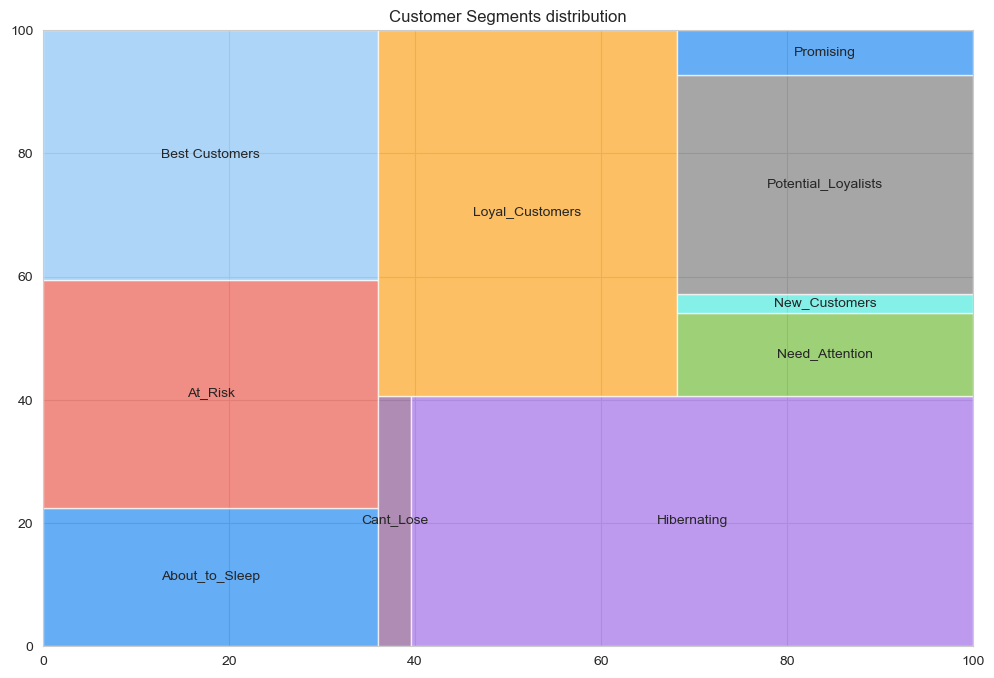

In [49]:
#let's exclude others segment for visualization
segment = list(retail_rfm_segments.Segment)
score = list(retail_rfm_segments.counts)
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f",'#50ebde','#808080']
plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')
squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)

plt.show()

In [50]:
# Exporting the final dataset and further using the same dataset for clustering 

rfm.to_csv('OnlineRetail_custsegment.csv', index=False)

# <center> Model Building <center>

In [51]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'RecencyScore',
       'FrequencyScore', 'MonetaryScore', 'RFM_SCORE', 'Segment'],
      dtype='object')

In [52]:
# filtering the required columns from the rfm dataset

rfm_final = rfm.loc[:, ['CustomerID', 'Recency', 'Frequency', 'Monetary']]
print(f"Shape of the dataset: {rfm_final.shape}")
rfm_final.head()

Shape of the dataset: (4339, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,1.04
1,12347.0,1,7,481.21
2,12348.0,74,4,178.71
3,12349.0,18,1,605.10
4,12350.0,309,1,65.30


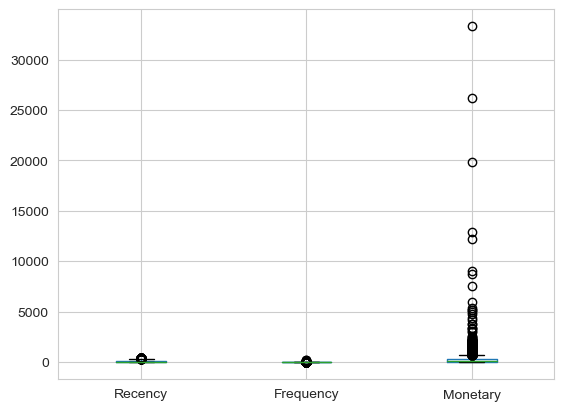

In [53]:
rfm_final[["Recency", "Frequency", "Monetary"]].boxplot();

### Fixing the outliers before proceeding for the model

In [54]:
Q1 = rfm_final.Recency.quantile(0.05)
Q3 = rfm_final.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(rfm_final.Recency >= Q1 - 1.5*IQR) & (rfm_final.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm_final.Frequency.quantile(0.05)
Q3 = rfm_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(rfm_final.Frequency >= Q1 - 1.5*IQR) & (rfm_final.Frequency <= Q3 + 1.5*IQR)]

Q1 = rfm_final.Monetary.quantile(0.05)
Q3 = rfm_final.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm_final = rfm_final[(rfm_final.Monetary >= Q1 - 1.5*IQR) & (rfm_final.Monetary <= Q3 + 1.5*IQR)]

In [55]:
#scaling
X = rfm_final[['Frequency', 'Recency', 'Monetary']]
scaler = StandardScaler()
rfm_ds_scaled = scaler.fit_transform(X)

In [56]:
# scaled the data with StandardScaler and assigned a variable for scaled data
rfm_ds_scaled = pd.DataFrame(rfm_ds_scaled)
rfm_ds_scaled.columns = ['Frequency', 'Recency', 'Monetary']
rfm_ds_scaled.head()

,Frequency,Recency,Monetary
0,-0.663963,2.322376,-0.761393
1,0.801925,-0.914465,0.809315
2,0.068981,-0.185177,-0.180208
3,-0.663963,-0.744630,1.214577
4,-0.663963,2.162532,-0.551189


In [57]:
#model creation for K=3
kmeans_k3 = KMeans(n_clusters=3, n_init=5, max_iter=250, verbose=3, algorithm='elkan')
kmeans_k3.fit(rfm_ds_scaled)
lbs = kmeans_k3.labels_
print(kmeans_k3.labels_)

inertia = kmeans_k3.inertia_
print(inertia)

Initialization complete
Iteration 0, inertia 6631.499894054859
Iteration 1, inertia 4803.2846820211935
Iteration 2, inertia 4524.905511039282
Iteration 3, inertia 4435.074809777434
Iteration 4, inertia 4401.950309710318
Iteration 5, inertia 4392.726053995974
Iteration 6, inertia 4389.14758227093
Iteration 7, inertia 4387.57148757122
Iteration 8, inertia 4386.820781537195
Iteration 9, inertia 4386.328231777669
Converged at iteration 9: center shift 4.8880511158624217e-05 within tolerance 9.999999999999979e-05.
Initialization complete
Iteration 0, inertia 6967.582299978944
Iteration 1, inertia 6497.135805116177
Iteration 2, inertia 6335.945829780019
Iteration 3, inertia 6232.971117441983
Iteration 4, inertia 6160.9430263884515
Iteration 5, inertia 6101.900417928354
Iteration 6, inertia 6049.625110864416
Iteration 7, inertia 5994.301320950949
Iteration 8, inertia 5935.846532643138
Iteration 9, inertia 5866.131959470529
Iteration 10, inertia 5769.632017920156
Iteration 11, inertia 5586.162

# <center> Model Evaluation and Techniques </center>

K-means is an unsupervised machine learning algorithm that is used to group data into clusters based on similarity. Unlike supervised algorithms, there is no clear metric for evaluating the performance of a K-means model. However, there are some techniques that can be used to evaluate the quality of the clustering results. Here are some common evaluation techniques for K-means in Python:

1. Inertia: Inertia measures the sum of squared distances of samples to their closest cluster center. A lower inertia value indicates better clustering performance. You can use the inertia_ attribute of the KMeans object in Scikit-Learn to calculate the inertia of the model. However, inertia alone may not be a reliable metric for evaluation if we don't have prior knowledge of the number of clusters.


2. Silhouette Score: Silhouette score measures how similar an object is to its own cluster compared to other clusters. It takes values between -1 and 1, with values closer to 1 indicating better clustering performance. We can use the silhouette_score() function from Scikit-Learn to calculate the silhouette score of the model.


3. Elbow Method: The elbow method is a graphical technique for evaluating the performance of a K-means model by plotting the inertia as a function of the number of clusters. The idea is to choose the number of clusters at the "elbow" of the curve, where the inertia starts to decrease at a slower rate. We can use the KElbowVisualizer() function from the yellowbrick library to visualize the elbow method or alternatively, using the WCSS score.


4. Visual Inspection: You can also visually inspect the clustering results to evaluate the quality of the model. You can use scatter plots or other visualization techniques to visualize the data points with their assigned cluster labels. If the clusters are well separated and there is minimal overlap, it indicates good clustering performance.


**Reference:** Link: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [58]:
# 1. Inertia

print(inertia)

4386.292576289084


In [59]:
# 2.Silhouette Score

#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=250)
    kmeans.fit(rfm_ds_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_ds_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5322166790563784
For n_clusters=3, the silhouette score is 0.5018866215764767
For n_clusters=4, the silhouette score is 0.48340729083864337
For n_clusters=5, the silhouette score is 0.40138887489017216
For n_clusters=6, the silhouette score is 0.40492416091010375
For n_clusters=7, the silhouette score is 0.394889950795094
For n_clusters=8, the silhouette score is 0.3784855169421591
For n_clusters=9, the silhouette score is 0.37172758026211017


**Inference:** Most probably we can say their, may be model will overfit after the cluster number 4, here, I am continuing with the number of cluster as 3.

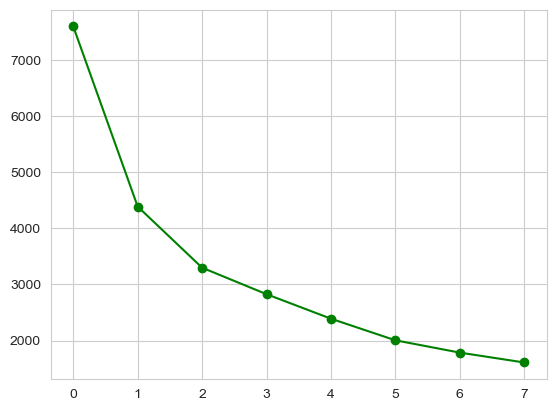

In [60]:
# 3. Elbow Method

#wss
wss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=250)
    kmeans.fit(rfm_ds_scaled)
    wss.append(kmeans.inertia_)
    
plt.plot(wss, marker='o', color='g')

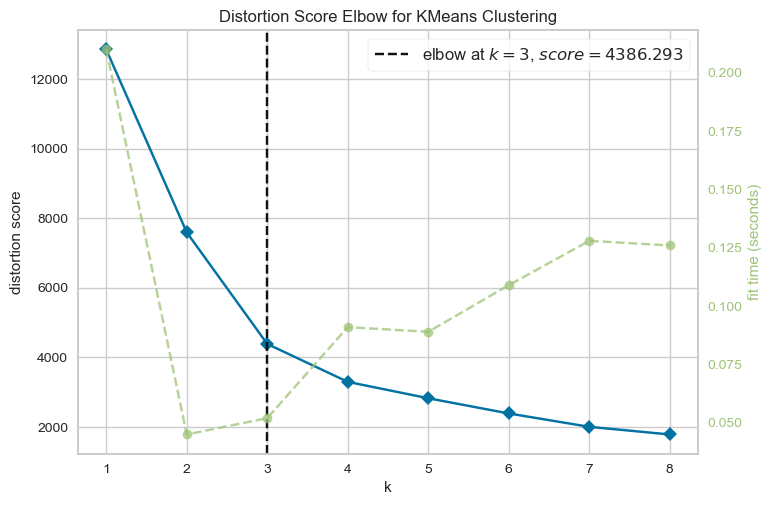

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [61]:
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# alternate method for the elbow method to find the optimal number of clusters
visualizer = KElbowVisualizer(kmeans, k=(1, 9))
visualizer.fit(rfm_ds_scaled)
visualizer.show()

**Inference:** Here, we can clearly observe that the line becomes straight and have no changes after crossing the mark of 2, so we can say n_cluster = 3 will be the right choice for this model.

# <center> Assumption </center>

Here, we can see that the K=5 have lower scores obtained during the **Silhouette Analysis** and **KElbowVisualiser**, post K=5 scores is started to increase and we can say it's probably started to overfit.

So, we can also fit another model to segment different types of customer with same hyper-parameter used for K=5.

In [62]:
#model creation for K=5
kmeans_k5 = KMeans(n_clusters=5, n_init=5, max_iter=250, verbose=3, algorithm='elkan')
kmeans_k5.fit(rfm_ds_scaled)
lbs_k5 = kmeans_k5.labels_
print(kmeans_k5.labels_)

inertia_k5 = kmeans_k5.inertia_
print(inertia_k5)

Initialization complete
Iteration 0, inertia 3123.7856109207823
Iteration 1, inertia 2848.7204124312543
Iteration 2, inertia 2837.6462620885954
Iteration 3, inertia 2834.109054525102
Iteration 4, inertia 2831.3414685106973
Iteration 5, inertia 2829.7805652136617
Iteration 6, inertia 2828.5871397278743
Iteration 7, inertia 2827.9160321059353
Iteration 8, inertia 2827.5516420006093
Iteration 9, inertia 2827.2781554670455
Converged at iteration 9: center shift 7.030597033151666e-05 within tolerance 9.999999999999979e-05.
Initialization complete
Iteration 0, inertia 5584.142729902314
Iteration 1, inertia 3322.8551676644292
Iteration 2, inertia 2930.474217930272
Iteration 3, inertia 2865.4947683849823
Iteration 4, inertia 2853.457359307161
Iteration 5, inertia 2848.8044453408484
Iteration 6, inertia 2843.9261588723134
Iteration 7, inertia 2840.2500914688294
Iteration 8, inertia 2838.4676098792816
Iteration 9, inertia 2837.8620669404777
Iteration 10, inertia 2837.5120487224217
Iteration 11, 

In [63]:
kmeans_k5.labels_

array([1, 0, 4, ..., 4, 2, 4])

In [64]:
# creating a columns for the clusters acquired
rfm_final['Cluster_Id'] = lbs
rfm_final['Cluster_Id_K5'] = lbs_k5
rfm_final.head()

,CustomerID,Recency,Frequency,Monetary,Cluster_Id,Cluster_Id_K5
0,12346.0,325,1,1.04,1,1
1,12347.0,1,7,481.21,0,0
2,12348.0,74,4,178.71,0,4
3,12349.0,18,1,605.10,0,0
4,12350.0,309,1,65.30,1,1


In [65]:
from mpl_toolkits.mplot3d import Axes3D
import math

# Visualize the clustering results
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(rfm_final['Recency'], rfm_final['Frequency'], rfm_final['Monetary'], c=kmeans.labels_)
# ax.set_xlabel('Recency')
# ax.set_ylabel('Frequency')
# ax.set_zlabel('Monetary')
# ax.set_title('KMeans Clustering Results with 3 Features')
# plt.show()


# xs = rfm_ds_scaled.Recency.apply(np.log)
# ys = rfm_ds_scaled.Frequency.apply(np.log)
# zs = rfm_ds_scaled.Monetary.apply(np.log)
# ax.scatter(xs, ys, zs, c=kmeans.labels_)

# ax.set_xlabel('Recency')
# ax.set_ylabel('Frequency')
# ax.set_zlabel('Monetary')
# ax.set_title('KMeans Clustering Results with 3 Features')
# plt.show()

**Getting error while plotting with 3 features for K=3, beacause the data are un-even. However, I have plotted it saperately.**

<AxesSubplot: xlabel='Cluster_Id', ylabel='Recency'>

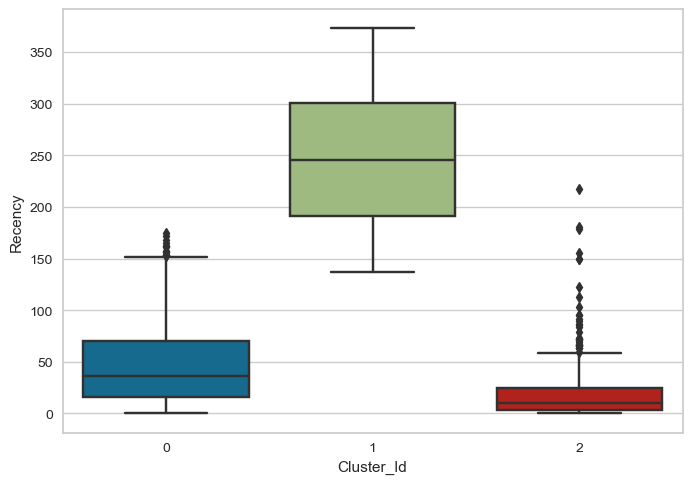

In [66]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_final)

<AxesSubplot: xlabel='Cluster_Id', ylabel='Frequency'>

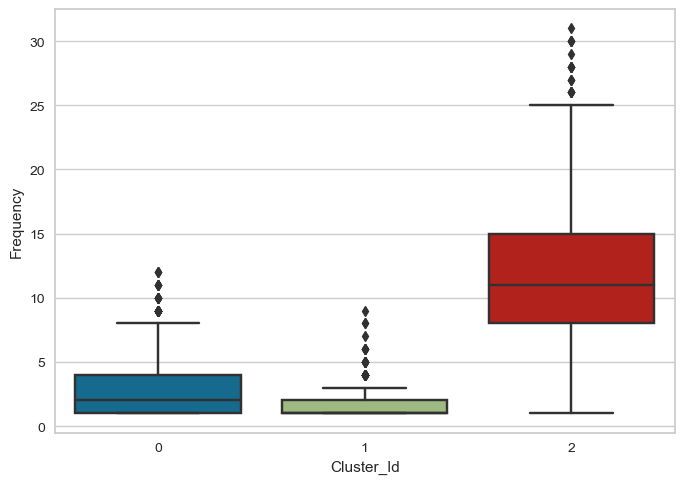

In [67]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_final)

<AxesSubplot: xlabel='Cluster_Id', ylabel='Monetary'>

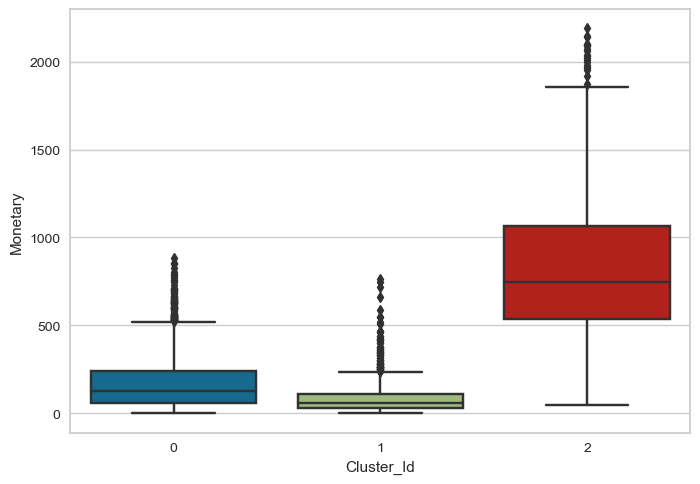

In [68]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_final)

In [69]:
# saving the dataset with their cluster_id
rfm_final.to_csv('OnlineRetail_with_clusterlabels.csv', index=False)

**Getting error while plotting with 3 features for K=5, beacause the data are un-even. However, I have plotted it saperately.**

<AxesSubplot: xlabel='Cluster_Id_K5', ylabel='Recency'>

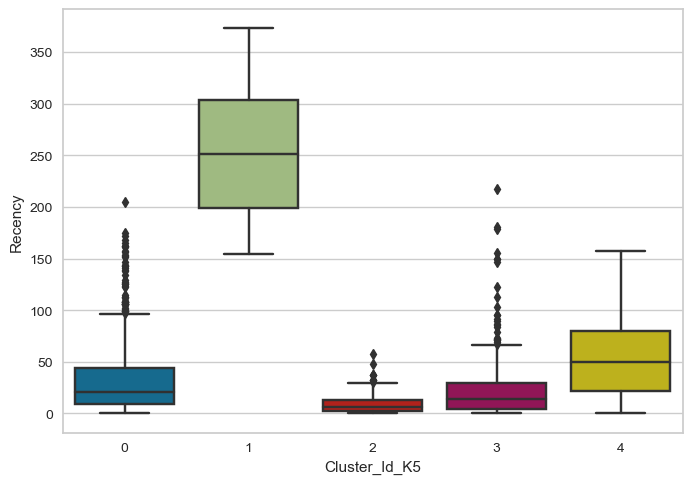

In [70]:
sns.boxplot(x='Cluster_Id_K5', y='Recency', data=rfm_final)

<AxesSubplot: xlabel='Cluster_Id_K5', ylabel='Frequency'>

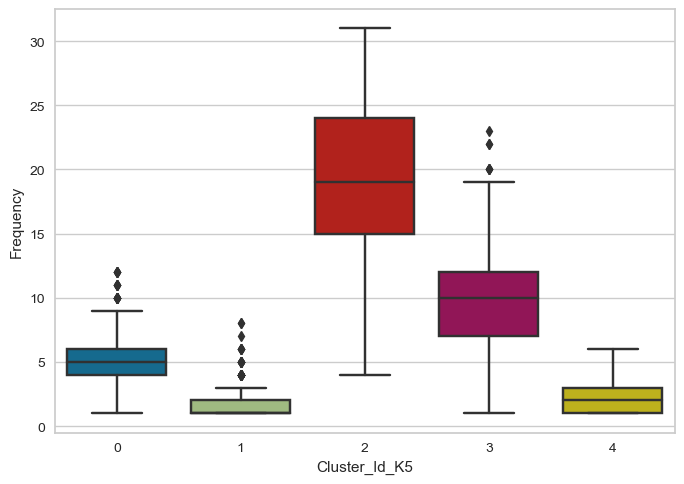

In [71]:
sns.boxplot(x='Cluster_Id_K5', y='Frequency', data=rfm_final)

<AxesSubplot: xlabel='Cluster_Id_K5', ylabel='Monetary'>

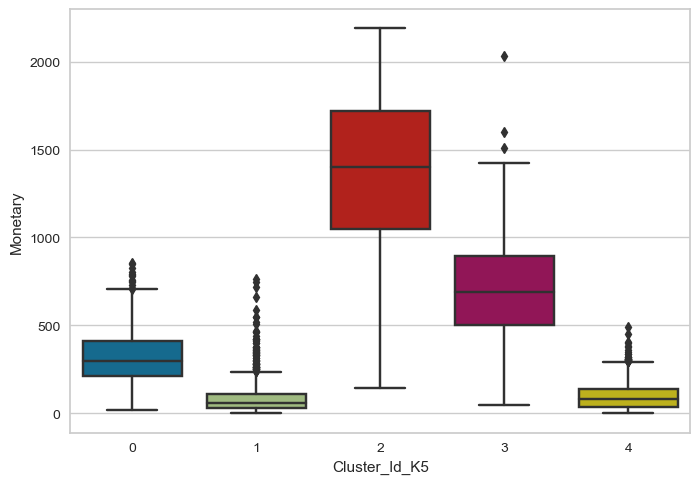

In [72]:
sns.boxplot(x='Cluster_Id_K5', y='Monetary', data=rfm_final)

### Observations and Inferences:  

<strong>1. Three Clusters (Customer Segments): </strong>    
Carefully examining the three cluster classification, we observe following groups of customers:    
 1. **High value customer:**     
 **'Cluster 1'** is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently.    
 2. **Medium value customer: **     
 **'Cluster 0'** appears to be the medium valued customer segment. These customers place an order of a considerable amount, though not as much as high valued customers, but still quite higher than low valued customers. Also, their orders are relatively more frequent than the lowest value segment.    
 3. **Low value customer: **    
 
It is quite evident that **'Cluster 2'** has customers who rarely shop and when they order, their orders are pretty low valued. 

Apart from the numbers, the visualization of clusters in **Silhoutte Analysis** show that all three customer segments are quite distinct with very less overlapp between them. The general trend resonated in these 3 clusters is that high monetary value is correlated with high frequency of orders and more recent ones. 

---
   
<strong>2. Five Clusters (Customer Segments): </strong>    
In five clusters, we find the following customer segments:   
1. ** Overall high valued customers: **     
 *'Cluster 0'* is the typical high value customer who has shopped recently and shops regularly for high value orders. 
 
2. **High monetary value but less frequent: **     
 **'Cluster 4'** represents a peculiar customer segment who place quite a high valued order but do not do so frequently or have not done much recently. But, these customers do hold a lot of promise if targeted to improve sales.
 
3. **Medium value - low frequency - recent customers: **  
 
  The customers from **'Cluster 3'** have recently placed medium valued orders but do not do so frequently.   
  
4. **Medium value - low frequency - older customers: ** 

  The customers from **'Cluster 2 and 0'** happen to place medium valued orders quite a long time ago and they do not do so frequently. 
  
5. **Low valued customers: **     
 
 **'Cluster 1'** is the segment of customers who have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values. 
 
 The visualization of clusters in *Silhoutte Analysis* show some overlapp between the customer segments.    
 However, the dataset does not distinguish between wholesale and retail customers, it is quite likely that high value frequent clients are the wholesale dealers and medium/ low valued ones are individual retail purchasers.
 
--- 


### Conclusion:    
The customer segments thus deduced can be very useful in targeted marketing, scouting for new customers and ultimately revenue growth. After knowing the types of customers, it depends upon the retailer policy whether to chase the high value customers and offer them better service and discounts or try and encourage low/ medium value customers to shop more freqently or of higher monetary values.

In [73]:
# Saving the model

import pickle

filename = 'kmeans_k3.pkl'
pickle.dump(kmeans_k3, open(filename, 'wb'))

filename = 'kmeans_k5.pkl'
pickle.dump(kmeans_k5, open(filename, 'wb'))